In [2]:
import pandas as pd
import numpy as np
import scipy as sp



In [3]:
def read_csv_file(f,logging=False):
    data = pd.read_csv(f)
    print(data.head(5))
    print(f,"包含一下列")
    print(data.columns.values)
    return data
    

In [4]:
def categories_process_first_class(cate):
    cate = str(cate)
    if len(cate) == 1:
        if int(cate) == 0:
            return 0
    else:
        return int(cate[0])

In [5]:
def categories_process_second_class(cate):
    cate = str(cate)
    if len(cate) < 3:
        return 0
    else:
        return int(cate[1:])

In [6]:
def age_process(age):
    age = int(age)
    if age==0:
        return 0
    elif age<15:
        return 1
    elif age<25:
        return 2
    elif age<40:
        return 3
    elif age<60:
        return 4
    else:
        return 5

In [7]:
def process_province(hometown):
    hometown = str(hometown)
    province = int(hometown[0:2])
    return province

In [33]:
def process_city(hometown):
    hometown = str(hometown)
    if len(hometown) > 1:
        hometown = int(hometown[2:])
    else:
        hometown = 0
    
    return hometown

In [9]:
def get_time_day(t):
    t = str(t)
    t=int(t[0:2])
    return t

#一天切成4段
def get_time_hour(t):
    t = str(t)
    t=int(t[2:4])
    if t<6:
        return 0
    elif t<12:
        return 1
    elif t<18:
        return 2
    else:
        return 3

In [10]:
def logloss(act, pred):
  epsilon = 1e-15
  pred = sp.maximum(epsilon, pred)
  pred = sp.minimum(1-epsilon, pred)
  ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
  ll = ll * -1.0/len(act)
  return ll

In [11]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler

In [64]:
train_data = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/train.csv',logging=True)
ad = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/ad.csv',logging=True)


   label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  
0               1                 1  
1               1                 2  
2               4                 1  
3               1                 1  
4               1                 1  
/Users/wjj/Desktop/七月在线第七课/data/train.csv 包含一下列
['label' 'clickTime' 'conversionTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']
   creativeID  adID  camgaignID  advertiserID  appID  appPlatform
0        4079  2318         147            80     14            2
1        4565  3593         632             3   

In [65]:
app_categories = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/app_categories.csv',logging=True)


   appID  appCategory
0     14            2
1     25          203
2     68          104
3     75          402
4     83          203
/Users/wjj/Desktop/七月在线第七课/data/app_categories.csv 包含一下列
['appID' 'appCategory']


In [66]:
#应用app分类识别方法取出app推荐位置的类别
app_categories["categories_process_first_class"] = app_categories['appCategory'].apply(categories_process_first_class)
app_categories['categories_process_second_class'] = app_categories['appCategory'].apply(categories_process_second_class)

In [67]:
app_categories.head(5)

,appID,appCategory,categories_process_first_class,categories_process_second_class
0,14,2,NaN,0
1,25,203,2.0,3
2,68,104,1.0,4
3,75,402,4.0,2
4,83,203,2.0,3


In [68]:
user = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/user.csv',logging=True)

   userID  age  gender  education  marriageStatus  haveBaby  hometown  \
0       1   42       1          0               2         0       512   
1       2   18       1          5               1         0      1403   
2       3    0       2          4               0         0         0   
3       4   21       2          5               3         0       607   
4       5   22       2          0               0         0         0   

   residence  
0        503  
1       1403  
2          0  
3        607  
4       1301  
/Users/wjj/Desktop/七月在线第七课/data/user.csv 包含一下列
['userID' 'age' 'gender' 'education' 'marriageStatus' 'haveBaby'
 'hometown' 'residence']


In [69]:
user.age.value_counts()

0     294271
15    150175
16    120322
17    115704
19    115692
13    114651
20    112301
18    110549
14    107356
25     99378
21     96306
26     92987
22     91733
12     88838
23     87728
27     84934
28     80358
24     79479
11     78679
29     68688
30     55187
31     47475
33     43033
32     41638
10     39061
34     34062
35     33106
36     29333
37     26512
38     21280
       ...  
6       3924
5       3395
54      2193
55      2111
4       1959
56      1795
57      1771
58      1527
59      1362
60      1100
61       923
62       412
63       292
66       285
65       266
64       234
67       220
80       165
68       145
69       124
70       123
71       104
78        89
73        87
74        86
76        85
75        81
72        77
77        72
79        55
Name: age, Length: 81, dtype: int64

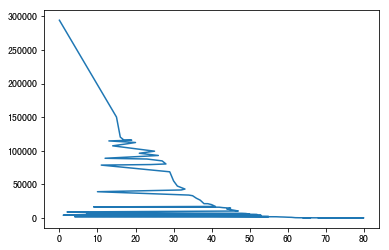

In [70]:
#看一下用户年龄分布，找到适合的切分点，要按人数等分而不是按年龄，发现十几岁用户居多
import matplotlib.pyplot as plt
user.age.value_counts().plot()
plt.show()

In [71]:
#处理user信息
user['age_process'] = user['age'].apply(age_process)
user['hometown_province'] = user['hometown'].apply(process_province)
user['hometown_city'] = user['hometown'].apply(process_city)
user['residence_province'] = user['residence'].apply(process_province)
user['residence_city'] = user['residence'].apply(process_city)
user

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence,age_process,hometown_province,hometown_city,residence_province,residence_city
0,1,42,1,0,2,0,512,503,4,51,2,50,3
1,2,18,1,5,1,0,1403,1403,2,14,3,14,3
2,3,0,2,4,0,0,0,0,0,0,0,0,0
3,4,21,2,5,3,0,607,607,2,60,7,60,7
4,5,22,2,0,0,0,0,1301,2,0,0,13,1
5,6,20,2,0,0,0,301,2301,2,30,1,23,1
6,7,17,1,5,0,0,313,313,2,31,3,31,3
7,8,21,1,2,3,1,1607,1607,2,16,7,16,7
8,9,38,2,2,2,0,2203,2203,3,22,3,22,3
9,10,13,2,0,0,0,0,2203,1,0,0,22,3


In [72]:
#0岁代表没有数据，所以在看数据的时候要剔除
user[user.age!=0].describe()

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence,age_process,hometown_province,hometown_city,residence_province,residence_city
count,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06,2.510847e+06
mean,1.393745e+06,2.277593e+01,1.410284e+00,1.975580e+00,1.017286e+00,3.033893e-01,7.372152e+02,9.797279e+02,2.252490e+00,2.312017e+01,2.873596e+00,2.879952e+01,3.668985e+00
std,8.105652e+05,9.675687e+00,5.321244e-01,1.577530e+00,9.508679e-01,8.098684e-01,7.746096e+02,7.855014e+02,8.460603e-01,2.472208e+01,3.033409e+00,2.273902e+01,2.994358e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.903605e+05,1.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.050000e+02,2.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.000000e+00
50%,1.388503e+06,2.100000e+01,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,5.030000e+02,8.030000e+02,2.000000e+00,1.600000e+01,2.000000e+00,2.000000e+01,3.000000e+00
75%,2.095096e+06,2.800000e+01,2.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,1.301000e+03,1.513000e+03,3.000000e+00,3.000000e+01,5.000000e+00,4.000000e+01,6.000000e+00
max,2.805118e+06,8.000000e+01,2.000000e+00,7.000000e+00,3.000000e+00,6.000000e+00,3.401000e+03,3.401000e+03,5.000000e+00,9.100000e+01,1.600000e+01,9.100000e+01,1.800000e+01


In [73]:
train_data.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [74]:
train_data['clickTime_day'] = train_data['clickTime'].apply(get_time_day)
train_data['clickTime_hour'] = train_data['clickTime'].apply(get_time_hour)

In [75]:
train_data.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour
0,0,170000,NaN,3089,2798058,293,1,1,17,0
1,0,170000,NaN,1259,463234,6161,1,2,17,0
2,0,170000,NaN,4465,1857485,7434,4,1,17,0
3,0,170000,NaN,1004,2038823,977,1,1,17,0
4,0,170000,NaN,1887,2015141,3688,1,1,17,0


In [76]:
test_data = read_csv_file('/Users/wjj/Desktop/七月在线第七课/data/test.csv',logging=True)
test_data['clickTime_day'] = test_data['clickTime'].apply(get_time_day)
test_data['clickTime_hour'] = test_data['clickTime'].apply(get_time_hour)

   instanceID  label  clickTime  creativeID   userID  positionID  \
0           1     -1     310000        3745  1164848        3451   
1           2     -1     310000        2284  2127247        1613   
2           3     -1     310000        1456  2769125        5510   
3           4     -1     310000        4565     9762        4113   
4           5     -1     310000          49  2513636        3615   

   connectionType  telecomsOperator  
0               1                 3  
1               1                 3  
2               2                 1  
3               2                 3  
4               1                 3  
/Users/wjj/Desktop/七月在线第七课/data/test.csv 包含一下列
['instanceID' 'label' 'clickTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']


In [77]:
train_user = pd.merge(train_data, user, on='userID')
train_user_ad = pd.merge(train_user, ad, on='creativeID')


In [78]:
train_user_ad_app = pd.merge(train_user_ad,app_categories,on='appID')

In [79]:
train_user_ad_app.describe()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,...,residence_province,residence_city,adID,camgaignID,advertiserID,appID,appPlatform,appCategory,categories_process_first_class,categories_process_second_class
count,3.749528e+06,3.749528e+06,93262.000000,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,...,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.749528e+06,3.270795e+06,3.749528e+06
mean,2.487300e-02,2.418317e+05,242645.358013,3.261575e+03,1.405349e+06,3.702799e+03,1.222590e+00,1.605879e+00,2.403944e+01,1.934587e+00,...,2.753816e+01,3.560234e+00,2.005435e+03,4.155907e+02,2.776200e+01,3.703212e+02,1.217947e+00,1.819372e+02,2.015659e+00,5.851555e+00
std,1.557380e-01,3.958793e+04,39285.385532,1.829643e+03,8.088094e+05,1.923724e+03,5.744428e-01,8.491127e-01,3.954420e+00,9.674365e-01,...,2.271045e+01,3.020678e+00,1.250836e+03,2.134300e+02,3.274570e+01,1.440570e+02,4.128515e-01,1.032034e+02,8.295684e-01,3.682285e+00
min,0.000000e+00,1.700000e+05,170005.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.116270e+05,211626.000000,1.540000e+03,7.058698e+05,2.579000e+03,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,...,1.200000e+01,1.000000e+00,7.610000e+02,2.050000e+02,3.000000e+00,3.600000e+02,1.000000e+00,1.040000e+02,2.000000e+00,2.000000e+00
50%,0.000000e+00,2.418390e+05,242106.000000,3.465000e+03,1.407062e+06,3.322000e+03,1.000000e+00,1.000000e+00,2.400000e+01,2.000000e+00,...,2.000000e+01,3.000000e+00,1.977000e+03,4.600000e+02,3.000000e+00,4.650000e+02,1.000000e+00,2.090000e+02,2.000000e+00,9.000000e+00
75%,0.000000e+00,2.722170e+05,272344.000000,4.565000e+03,2.105989e+06,4.896000e+03,1.000000e+00,2.000000e+00,2.700000e+01,3.000000e+00,...,4.000000e+01,6.000000e+00,3.242000e+03,6.320000e+02,5.600000e+01,4.650000e+02,1.000000e+00,2.090000e+02,2.000000e+00,9.000000e+00
max,1.000000e+00,3.023590e+05,302359.000000,6.582000e+03,2.805118e+06,7.645000e+03,4.000000e+00,3.000000e+00,3.000000e+01,3.000000e+00,...,9.100000e+01,1.800000e+01,3.616000e+03,7.200000e+02,9.100000e+01,4.720000e+02,2.000000e+00,5.030000e+02,5.000000e+00,9.000000e+00


In [80]:
train_user_ad_app.columns

Index(['label', 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'clickTime_day',
       'clickTime_hour', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'age_process', 'hometown_province',
       'hometown_city', 'residence_province', 'residence_city', 'adID',
       'camgaignID', 'advertiserID', 'appID', 'appPlatform', 'appCategory',
       'categories_process_first_class', 'categories_process_second_class'],
      dtype='object')

In [81]:
x_user_ad_app = train_user_ad_app.loc[:,['creativeID','userID','positionID',
 'connectionType','telecomsOperator','clickTime_day','clickTime_hour','age', 'gender' ,'education',
 'marriageStatus' ,'haveBaby' , 'residence' ,'age_process',
 'hometown_province', 'hometown_city','residence_province', 'residence_city',
 'adID', 'camgaignID', 'advertiserID', 'appID' ,'appPlatform' ,
 'app_categories_first_class' ,'app_categories_second_class']]

In [82]:
x_user_ad_app

,creativeID,userID,positionID,connectionType,telecomsOperator,clickTime_day,clickTime_hour,age,gender,education,...,hometown_city,residence_province,residence_city,adID,camgaignID,advertiserID,appID,appPlatform,app_categories_first_class,app_categories_second_class
0,3089,2798058,293,1,1,17,0,25,2,1,...,0,13,1,1321,83,10,434,1,NaN,NaN
1,3089,195578,3659,0,2,17,0,27,2,2,...,1,13,1,1321,83,10,434,1,NaN,NaN
2,3089,1462213,3659,0,3,17,0,35,2,0,...,0,13,1,1321,83,10,434,1,NaN,NaN
3,3089,1985880,5581,1,1,17,0,26,1,1,...,0,0,0,1321,83,10,434,1,NaN,NaN
4,3089,2152167,5581,1,1,17,0,23,1,0,...,4,13,3,1321,83,10,434,1,NaN,NaN
5,3089,2152167,5581,1,1,17,0,23,1,0,...,4,13,3,1321,83,10,434,1,NaN,NaN
6,3089,814178,5617,0,2,17,2,0,2,0,...,0,13,6,1321,83,10,434,1,NaN,NaN
7,3089,808237,3659,0,2,22,1,14,1,0,...,1,13,1,1321,83,10,434,1,NaN,NaN
8,3089,2593794,3659,0,2,17,0,15,2,1,...,1,13,1,1321,83,10,434,1,NaN,NaN
9,3089,1563526,5079,2,2,22,1,48,1,4,...,5,13,3,1321,83,10,434,1,NaN,NaN


In [83]:
#特征部分本来是int64，压缩成int32，节约储存空间，如果不是有ID特征在，还可以压缩到更小。先取出值values再压缩
x_user_ad_app = np.array(x_user_ad_app.values,dtype='int32')

In [85]:
y_user_ad_app = train_user_ad_app.loc[:,['label']].values

In [86]:
#随机森林,交叉验证集，数据切分到引入
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
feat_labels = np.array(['creativeID','userID','positionID',
 'connectionType','telecomsOperator','clickTime_day','clickTime_hour','age', 'gender' ,'education',
 'marriageStatus' ,'haveBaby' , 'residence' ,'age_process',
 'hometown_province', 'hometown_city','residence_province', 'residence_city',
 'adID', 'camgaignID', 'advertiserID', 'appID' ,'appPlatform' ,
 'app_categories_first_class' ,'app_categories_second_class'])
#数的数量为100，随机种子random_state
forest = RandomForestClassifier(n_estimators=100,
                                random_state=0,
                                n_jobs=-1)

In [88]:
forest.fit(x_user_ad_app,y_user_ad_app)

/Users/wjj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [94]:
#特征重要性
importances = forest.feature_importances_

In [95]:
#按重要程度从高到低排列,重要度越高越需要更深的特征挖掘，也就是再加工
indices = np.argsort(importances)[::-1]

 1) userID                         0.165072
 2) residence                      0.099218
 3) clickTime_day                  0.077277
 4) age                            0.075471
 5) positionID                     0.065426
 6) residence_province             0.063809
 7) residence_city                 0.058211
 8) hometown_province              0.053386
 9) education                      0.048571
10) hometown_city                  0.047720
11) clickTime_hour                 0.039285
12) telecomsOperator               0.032073
13) marriageStatus                 0.031546
14) creativeID                     0.029861
15) adID                           0.020425
16) haveBaby                       0.018434
17) camgaignID                     0.017714
18) age_process                    0.015907
19) advertiserID                   0.012847
20) gender                         0.012654
21) appID                          0.009894
22) connectionType                 0.004184
23) appPlatform                 

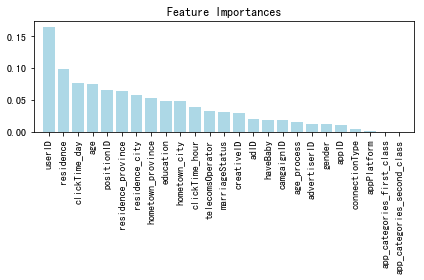

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(x_user_ad_app.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(x_user_ad_app.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(x_user_ad_app.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, x_user_ad_app.shape[1]])
plt.tight_layout()
#可以储存这张图片
#plt.savefig('./random_forest.png', dpi=300)
plt.show()